## Data Analytics Project - US STATE CRIME (1960-2019)

Autors: Agnieszka Welian, Katarzyna Wątorska
<br>
Date: 14-06-2022

From the Unified Crime Reporting Statistics and under the collaboration of the U.S. Department of Justice and the Federal Bureau of Investigation information crime statistics are available for public review. The following data set has information on the crime rates and totals for states across the United States for a wide range of years. The crime reports are divided into two main categories: property and violent crime. Property crime refers to burglary, larceny, and motor related crime while violent crime refers to assault, murder, rape, and robbery. These reports go from 1960 to 2019.

The main goal of this project will be to take into consideration values from 1960 to 2019 and predict value of specific crime rare for 2020
 for selected state.

Source: https://think.cs.vt.edu/corgis/csv/state_crime/ (which are logged data from FBI page)

# 1. Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import scipy.stats as stats
import arviz as az

In [2]:
df = pd.read_csv("state_crime.csv")
df.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [3]:
df.columns

Index(['State', 'Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery'],
      dtype='object')

In [4]:
#isolating 1 state
california = df[df["State"] == "California"]

Text(0.5, 1.0, 'Data before shifting')

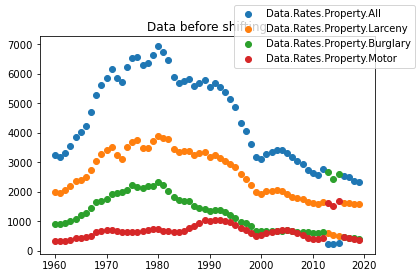

In [5]:
#sns.scatterplot(data=california, x = 'Year', y = 'Data.Population', hue = 'State')
fig,ax = plt.subplots()

# ax.scatter(data=california, x = 'Year', y = 'Data.Population')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Burglary')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Motor')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.All')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Assault')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Murder')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Robbery')
# ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Property.All')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Rape')
fig.legend()
plt.title("Data before shifting")

For the data that we plan to use there is a visible replacement in variables between the columns. After verifying data in csv with the FBI data, the result was that our hipotesis was correct - data was shifted, so we decided to shift the data between above columns.

In [6]:
for i in range(0, len(df)):
    if df['Data.Rates.Property.All'][i] <  df['Data.Rates.Property.Burglary'][i]:
        x = df['Data.Rates.Property.All'][i]
        df['Data.Rates.Property.All'][i] =  df['Data.Rates.Property.Burglary'][i]
        df['Data.Rates.Property.Burglary'][i] = x
    if df['Data.Rates.Property.Larceny'][i] <  df['Data.Rates.Property.Motor'][i]:
        y = df['Data.Rates.Property.Larceny'][i]
        df['Data.Rates.Property.Larceny'][i] =  df['Data.Rates.Property.Motor'][i]
        df['Data.Rates.Property.Motor'][i] = y
    if df['Data.Rates.Property.Burglary'][i] <  df['Data.Rates.Property.Motor'][i]:
        z = df['Data.Rates.Property.Burglary'][i]
        df['Data.Rates.Property.Burglary'][i] =  df['Data.Rates.Property.Motor'][i]
        df['Data.Rates.Property.Motor'][i] = z

# for j in range(0, len(df)):       
#     if df['Data.Rates.Property.Larceny'][j] <  df['Data.Rates.Property.Motor'][j]:
#         y = df['Data.Rates.Property.Larceny'][j]
#         df['Data.Rates.Property.Larceny'][j] =  df['Data.Rates.Property.Motor'][j]
#         df['Data.Rates.Property.Motor'][j] = y 

C:\Users\Agnieszka\AppData\Local\Temp\ipykernel_16400\2898082888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.All'][i] =  df['Data.Rates.Property.Burglary'][i]
C:\Users\Agnieszka\AppData\Local\Temp\ipykernel_16400\2898082888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.Burglary'][i] = x
C:\Users\Agnieszka\AppData\Local\Temp\ipykernel_16400\2898082888.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

Text(0.5, 1.0, 'Data after shifting')

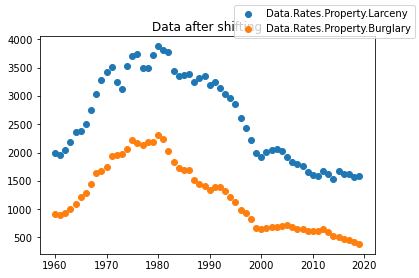

In [22]:
california = df[df["State"] == "California"]
fig,ax = plt.subplots()

# ax.scatter(data=california, x = 'Year', y = 'Data.Population')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Burglary')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Motor')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.All')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Assault')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Murder')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Robbery')
# ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Property.All')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Rape')
fig.legend()
plt.title("Data after shifting")

In [8]:
california.describe()

,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
count,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,1989.500000,2.855579e+07,4475.756667,1228.918333,2620.975000,616.905000,617.291667,339.663333,7.89000,34.218333,224.545000,1.163731e+06,3.580828e+05,691070.750000,201472.483333,178274.266667,99361.366667,2207.50000,9654.166667,62802.366667
std,17.464249,7.628299e+06,1478.502570,594.524257,778.947315,207.456626,242.850555,152.225295,3.11365,10.450099,104.734474,4.012412e+05,1.865597e+05,203269.217232,119409.517507,79088.695892,51175.017672,870.82368,3161.458981,30578.344402
min,1960.000000,1.571720e+07,2331.200000,386.100000,1527.400000,232.300000,232.700000,119.600000,3.70000,17.400000,19.500000,8.902900e+04,1.431020e+05,197404.000000,53453.000000,37558.000000,18796.000000,605.00000,2859.000000,7464.000000
25%,1974.750000,2.111550e+07,3177.725000,674.300000,1922.125000,443.275000,440.800000,241.225000,4.87500,25.300000,147.475000,9.858202e+05,2.317542e+05,620181.750000,139242.500000,136046.000000,53445.500000,1744.25000,8280.000000,48528.250000
50%,1989.500000,2.941151e+07,4294.700000,1164.950000,2555.650000,635.600000,572.700000,319.050000,6.85000,34.150000,198.450000,1.185550e+06,3.209860e+05,695103.000000,168435.500000,180857.000000,99075.500000,2188.50000,9872.500000,62310.000000
75%,2004.250000,3.592007e+07,5760.975000,1708.150000,3346.200000,696.875000,801.500000,410.650000,10.60000,41.650000,311.450000,1.492620e+06,4.356690e+05,859776.750000,241611.000000,210350.250000,136183.250000,2772.25000,11997.750000,84399.500000
max,2019.000000,3.955704e+07,6939.500000,2316.500000,3880.000000,1038.900000,1119.700000,641.600000,14.50000,58.200000,424.100000,1.726391e+06,1.024914e+06,986120.000000,656517.000000,345624.000000,198045.000000,4096.00000,15505.000000,130897.000000


In [9]:
# mean_all = round(california['Data.Rates.Property.Burglary'].mean())
# print(mean_all)
# std_all = round(california['Data.Rates.Property.Burglary'].std())
# print(std_all)
# len(california)

2621
779


60

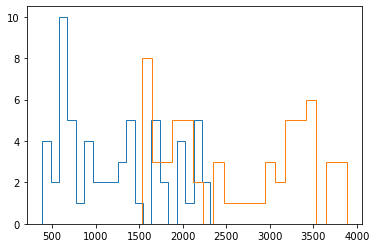

In [24]:
plt.hist(california['Data.Rates.Property.Burglary'], bins=20, label= "prior", histtype='step')
# plt.hist(california['Data.Rates.Property.Larceny'], bins=20, label= "actual data", histtype='step')
plt.show()

# Prior predictive check

In [10]:
normal_model1 = CmdStanModel(stan_file = 'normal_ppc.stan')

# normal_model1 = CmdStanModel(stan_file = 'prior_test.stan')
# stan_data={'N': len(california["Data.Rates.Property.All"]), "dane": california["Data.Rates.Property.All"], 'std': std_all, "mean": mean_all}

R = 60 #bc the data has been collected for 60 years
sim_normal = normal_model1.sample(iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)
# alpha_sim = sim.stan_variable('alpha')
# beta_sim = sim.stan_variable('beta')
mu_sim_normal = sim_normal.stan_variable('mu')
sigma_sim_normal = sim_normal.stan_variable('sigma')
prior_normal = sim_normal.stan_variable('prior')

INFO:cmdstanpy:compiling stan file C:\Users\Agnieszka\Desktop\drive\normal_ppc.stan to exe file C:\Users\Agnieszka\Desktop\drive\normal_ppc.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Agnieszka\Desktop\drive\normal_ppc.exe
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


[3404.15  2070.59  2467.44  2489.54  2885.65  1772.23  3385.45  3145.84
 2881.88  1520.23  3098.3   2420.07  5570.91  2061.14  3224.38  2165.78
 2753.66  2587.84  1757.5   2313.02  -989.559 2685.5   1973.44  2521.25
  825.973 1829.4   3611.97  2426.17  6598.43  2045.61  4018.7   3548.23
 2907.67  2581.59  4197.88  3404.48  2672.62   104.307 2080.25  2692.53
 2349.18  2121.97  2376.41  3177.6   2901.73  1739.56  3828.84  2794.52
 2925.94  2220.77  1522.94  3314.3   1912.31  2223.25  2489.7   2926.09
  211.489 3092.65  3392.97  1691.29 ]


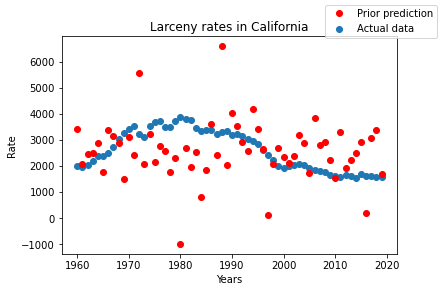

In [11]:
print(prior_normal)
fig,ax = plt.subplots()
x= list(range(1960,2020))
plt.plot(x, prior_normal, "o", color = 'red', label = 'Prior prediction')
ax.scatter(x = california['Year'], y = california["Data.Rates.Property.Larceny"], label = 'Actual data')
#ax.scatter(data=prior, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.set_ylabel("Rate")
ax.set_xlabel("Years")
ax.set_title("Larceny rates in California")
fig.legend()

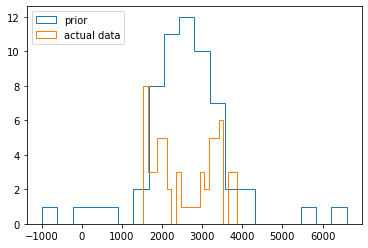

In [12]:
# prior.hist(column = 'Data.Rates.Property.Larceny', bins = 20)
# np.histogram(prior, bins = 20)
plt.hist(prior_normal, bins=20, label= "prior", histtype='step')
plt.hist(california['Data.Rates.Property.Larceny'], bins=20, label= "actual data", histtype='step')
plt.legend(loc="upper left")
plt.show()

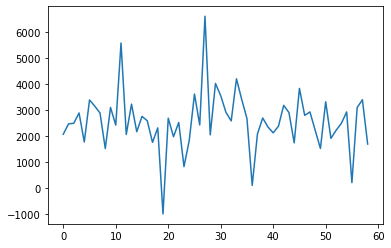

In [13]:
q50 =[]

for i in range(1,len(sim_normal.stan_variable('prior'))):
    q50.append(np.quantile(sim_normal.stan_variable('prior')[i],0.50))

plt.plot(q50)
plt.show()

## WITH NORMALIZATION

In [14]:
normalized_cal_lat = (california['Data.Rates.Property.Larceny'] - california['Data.Rates.Property.Larceny'].min())/(california['Data.Rates.Property.Larceny'].max() - california['Data.Rates.Property.Larceny'].min())
#odjac srednia, odchylenie standarodwe

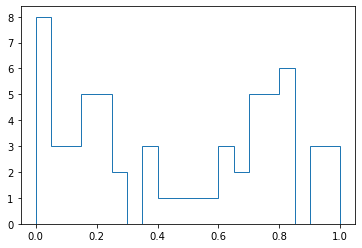

In [15]:
plt.hist(normalized_cal_lat, bins=20, label= "actual data", histtype='step')
plt.show()

In [16]:
normalized_cal_lat.describe()

count    60.000000
mean      0.464837
std       0.331101
min       0.000000
25%       0.167782
50%       0.437070
75%       0.773102
max       1.000000
Name: Data.Rates.Property.Larceny, dtype: float64

In [17]:
normal_model1 = CmdStanModel(stan_file = 'normal_normalized_ppc.stan')
stan_data={"data_mu": 0.464837, "data_sigma": 0.331101}

# normal_model1 = CmdStanModel(stan_file = 'prior_test.stan')
# stan_data={'N': len(california["Data.Rates.Property.All"]), "dane": california["Data.Rates.Property.All"], 'std': std_all, "mean": mean_all}

R = 60 #bc the data has been collected for 60 years
sim_normal_normalized = normal_model1.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)
# alpha_sim = sim.stan_variable('alpha')
# beta_sim = sim.stan_variable('beta')
mu_sim_normalized = sim_normal_normalized.stan_variable('mu')
sigma_sim_normalized = sim_normal_normalized.stan_variable('sigma')
prior_normalized = sim_normal_normalized.stan_variable('prior')

ValueError: no such file C:\Users\Agnieszka\Desktop\drive\normal_normalized_ppc.stan

In [ ]:
print(prior_normalized)

[ 0.724376   0.479883   0.093856   0.389185   0.806495   0.297377
  0.666575   0.653446   0.56602    0.388891   0.651341   1.15676
  1.1383     0.438641   0.762034   0.252101   0.509134   0.780088
  0.145275  -0.0709671  0.152324   0.486149   0.359199   0.665918
  0.602149   0.366643   0.912621   0.365335   1.02096    0.291372
  0.129879   0.900202   0.895726   0.530442   1.12114    0.895598
  0.383841   0.285192   0.345001   0.485466   0.404344   0.346995
  0.461897   0.781197   0.545679   0.13392    0.988358   0.934734
  0.565522   0.383208   0.37544    0.737251   0.217094   0.587496
  0.33526    0.698513  -0.727104   0.635334   1.14709    0.378369 ]


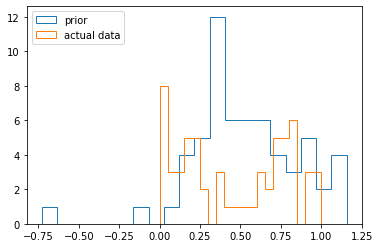

In [ ]:
# prior.hist(column = 'Data.Rates.Property.Larceny', bins = 20)
# np.histogram(prior, bins = 20)
plt.hist(prior_normalized, bins=20, label= "prior", histtype='step')
plt.hist(normalized_cal_lat, bins=20, label= "actual data", histtype='step')
plt.legend(loc="upper left")
plt.show()

In [ ]:
linear_normalized_model = CmdStanModel(stan_file = 'linear_normalized_ppc.stan')
stan_data={'N': len(normalized_cal_lat), "dane": normalized_cal_lat, 'std': 0.331101, "mean": 0.464837}

R = 60 #bc the data has been collected for 60 years
sim_linear_normalized = linear_normalized_model.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)
alpha_sim_linear = sim_linear_normalized.stan_variable('alpha')
beta_sim_linear = sim_linear_normalized.stan_variable('beta')
# mu_sim = sim.stan_variable('mu')
sigma_sim_linear = sim_linear_normalized.stan_variable('sigma')
prior_linear_normalized = sim_linear_normalized.stan_variable('prior')

INFO:cmdstanpy:compiling stan file C:\Users\Agnieszka\Desktop\drive\linear_normalized_ppc.stan to exe file C:\Users\Agnieszka\Desktop\drive\linear_normalized_ppc.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Agnieszka\Desktop\drive\linear_normalized_ppc.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Agnieszka/Desktop/drive/linear_normalized_ppc.hpp C:/Users/Agnieszka/Desktop/drive/linear_normalized_ppc.stan
Warning in 'C:/Users/Agnieszka/Desktop/drive/linear_normalized_ppc.stan', line 3, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Agnieszka/Desktop/drive/linear_normalized_ppc.stan', line 13, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0


INFO:cmdstanpy:CmdStan done processing.


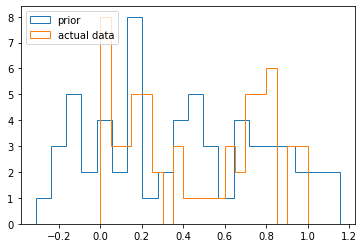

In [ ]:
# prior.hist(column = 'Data.Rates.Property.Larceny', bins = 20)
# np.histogram(prior, bins = 20)
plt.hist(prior_linear_normalized[:,1], bins=20, label= "prior", histtype='step')
plt.hist(normalized_cal_lat, bins=20, label= "actual data", histtype='step')
plt.legend(loc="upper left")
plt.show()

## POSTERIOR PREDICTIVE